<a href="https://colab.research.google.com/github/shreejitp/ExplainAI/blob/main/Shap_Values_Intro.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Explaining a Linear Regression Model using Shap Values** 

https://shap.readthedocs.io/en/latest/example_notebooks/overviews/An%20introduction%20to%20explainable%20AI%20with%20Shapley%20values.html

In [ ]:
pip install shap

  Created wheel for shap: filename=shap-0.38.1-cp36-cp36m-linux_x86_64.whl size=489405 sha256=0ba5d941fa30fd9d2f84113ad012358cb698fde3ba4607e3a8deddd8e68ed157
  Stored in directory: /root/.cache/pip/wheels/a8/fb/e4/88012be41842b9be62ae18d82d1b1e880daf8539d1fef1fa00
Successfully built shap


In [ ]:
import pandas as pd
import shap
import sklearn

# a classic housing price dataset
X,y = shap.datasets.boston()
X100 = shap.utils.sample(X, 100) # 100 instances for use as the background distribution

# a simple linear model
model = sklearn.linear_model.LinearRegression()
model.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
print("Model coefficients:\n")
for i in range(X.shape[1]):
    print(X.columns[i], "=", model.coef_[i].round(4))

Model coefficients:

CRIM = -0.108
ZN = 0.0464
INDUS = 0.0206
CHAS = 2.6867
NOX = -17.7666
RM = 3.8099
AGE = 0.0007
DIS = -1.4756
RAD = 0.306
TAX = -0.0123
PTRATIO = -0.9527
B = 0.0093
LSTAT = -0.5248


It is great have these coefficients. The magnitude of the coefficient is not always important as variables are all on a different scale. For ex, the coefficient obtained for age is based on age in years. If we have to take age in minutes, the new coefficent will be (0.0007*365*24*60=367.92)

**Partial Dependence Plots**

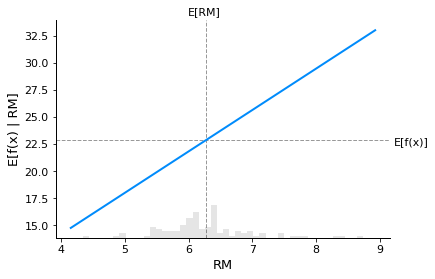

In [ ]:
shap.plots.partial_dependence(
    "RM", model.predict, X100, ice=False,
    model_expected_value=True, feature_expected_value=True
)

In the graph above, y axis is the target variable, x axis is the feature "RM"
The horizontal line is the baseline estimate (naive model or average value)
Blue line is the fit based on a linear model 
Shap Value in a linear model is essentially the difference between E[f(x)]
AND blue line for a particular RM value 

https://www.youtube.com/watch?v=-taOhqkiuIo&ab_channel=MicrosoftDeveloper



SHAP values can be very complicated to compute (they are NP-hard in general)


Permutation explainer: 507it [00:13, 38.68it/s]                         


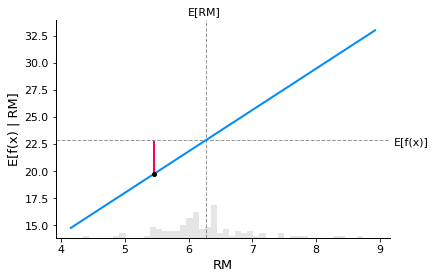

In [ ]:
# compute the SHAP values for the linear model
explainer = shap.Explainer(model.predict, X100)
shap_values = explainer(X)

# make a standard partial dependence plot
sample_ind = 18
shap.partial_dependence_plot(
    "RM", model.predict, X100, model_expected_value=True,
    feature_expected_value=True, ice=False,
    shap_values=shap_values[sample_ind:sample_ind+1,:]
)

The graph is quite similar to the partial dependence plot.
It is actually a mean centred version of the partial dependence plot 

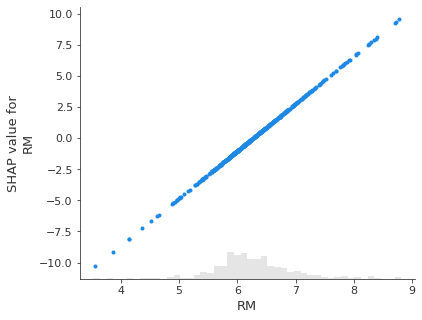

In [ ]:
shap.plots.scatter(shap_values[:,"RM"])

In [ ]:
shap_values

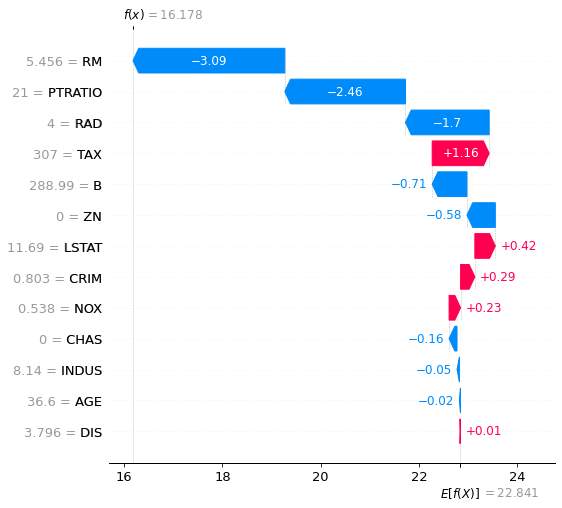

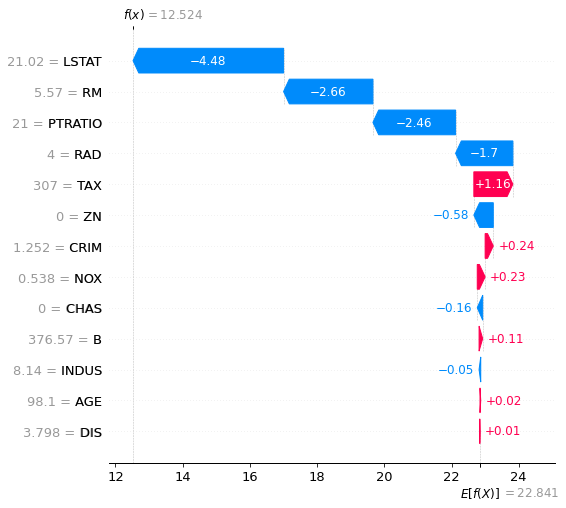

In [ ]:
# the waterfall_plot shows how we get from shap_values.base_values to model.predict(X)[sample_ind]
shap.plots.waterfall(shap_values[sample_ind], max_display=14) #value of sample index here is 18 from previous step
shap.plots.waterfall(shap_values[20], max_display=14) # For sample index 20 you have a different waterfall plot 

IS Shap values then at an observation level? or this is just to plot how we got to a decision ?

**Additive Regression Model** 

In [ ]:
!pip install interpret 

In [ ]:
# fit a GAM model to the data
import interpret.glassbox
model_ebm = interpret.glassbox.ExplainableBoostingRegressor()  #Explainable Boosting Regressor 
model_ebm.fit(X, y)

ExplainableBoostingRegressor(binning='quantile', early_stopping_rounds=50,
                             early_stopping_tolerance=0.0001,
                             feature_names=['CRIM', 'ZN', 'INDUS', 'CHAS',
                                            'NOX', 'RM', 'AGE', 'DIS', 'RAD',
                                            'TAX', 'PTRATIO', 'B', 'LSTAT',
                                            'DIS x LSTAT', 'CRIM x LSTAT',
                                            'AGE x LSTAT', 'TAX x LSTAT',
                                            'NOX x RM', 'DIS x B',
                                            'NOX x LSTAT', 'RM x TAX',
                                            'RM x PTRATIO', 'RM x RAD'],
                             feature_types=['continuous', 'continu...
                                            'continuous', 'interaction',
                                            'interaction', 'interaction',
                                            'interaction'

In [ ]:
# explain the GAM model with SHAP
explainer_ebm = shap.Explainer(model_ebm.predict, X100)
shap_values_ebm = explainer_ebm(X)

Permutation explainer: 507it [00:29, 17.17it/s]


In [ ]:
#shap_values_ebm

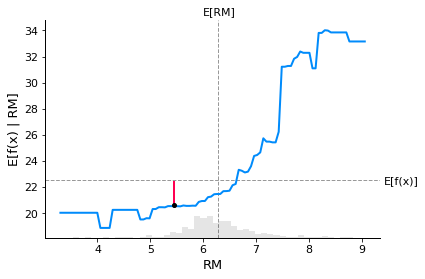

In [ ]:
# make a standard partial dependence plot with a single SHAP value overlaid
# IS the SHAP value for the 18th observation ??
fig,ax = shap.partial_dependence_plot(
    "RM", model_ebm.predict, X, model_expected_value=True,
    feature_expected_value=True, show=False, ice=False,
    shap_values=shap_values_ebm[sample_ind:sample_ind+1,:]
)

In [ ]:
X.shape # in your training you have this shape 

(506, 13)

In [ ]:
#shap_values_ebm.shape (506, 13)
# shap_values_ebm # Same shape as training 

shap_values_ebm[sample_ind:sample_ind+1,:]

.values =
array([[ 0.39819851, -0.10003233, -0.74444659, -0.08175457,  0.15450703,
        -1.85573213,  0.90399106,  0.40106383, -0.18435136, -0.1471819 ,
        -1.85033814, -0.87980546, -1.12490192]])

.base_values =
array([22.4662943])

.data =
array([[  0.80271,   0.     ,   8.14   ,   0.     ,   0.538  ,   5.456  ,
         36.6    ,   3.7965 ,   4.     , 307.     ,  21.     , 288.99   ,
         11.69   ]])

In [ ]:
shap_values_ebm[:,"RM"]

.values =
array([-0.38596141, -0.10003233,  0.82408389, -0.08175457,  0.24487784,
       -0.73695862,  0.51543823,  0.11257551, -0.05834592,  2.63822883,
       -0.07000622,  0.35264825,  2.46881067])

.base_values =
22.46629429546051

.data =
array([2.9850e-02, 0.0000e+00, 2.1800e+00, 0.0000e+00, 4.5800e-01,
       6.4300e+00, 5.8700e+01, 6.0622e+00, 3.0000e+00, 2.2200e+02,
       1.8700e+01, 3.9412e+02, 5.2100e+00])

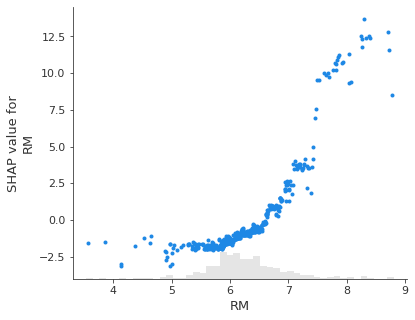

In [ ]:
shap.plots.scatter(shap_values_ebm[:,"RM"])

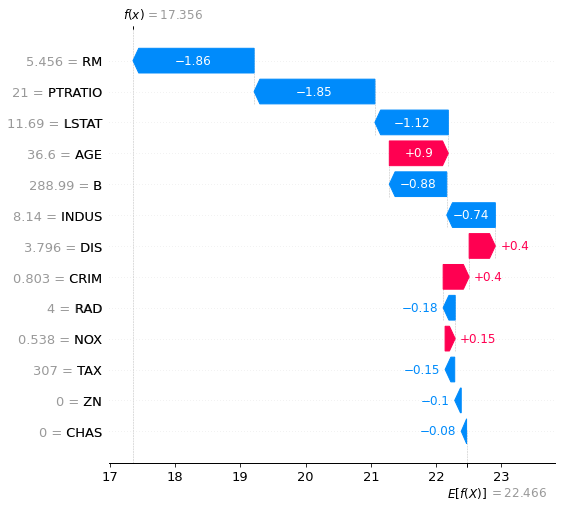

In [ ]:
# the waterfall_plot shows how we get from explainer.expected_value to model.predict(X)[sample_ind]
shap.plots.waterfall(shap_values_ebm[sample_ind], max_display=14)

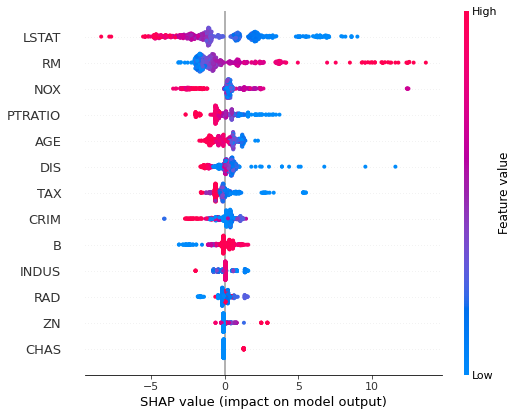

In [ ]:
# the waterfall_plot shows how we get from explainer.expected_value to model.predict(X)[sample_ind]
shap.plots.beeswarm(shap_values_ebm, max_display=14)   # Taking all shap values into consideration ??

Othe Explanations- 

https://github.com/smazzanti/tds_black_box_models_more_explainable
